## Understanding `nn.Sequential` in PyTorch

In PyTorch, `nn.Sequential` is a container module that is used to sequentially compose a series of neural network layers and operations. It simplifies the process of defining neural network architectures by allowing you to specify layers and operations in a linear sequence. Here are some key points about `nn.Sequential`:

1. **Simplified Network Definition**: Instead of explicitly defining each layer's forward pass and the connections between layers, you can define the layers sequentially. This can make your code more concise and easier to read.

2. **Automatic Forward Pass**: When you call the `forward` method of a `nn.Sequential` module with an input tensor, it will automatically pass the input through each module in the order they were added. You don't need to explicitly call each layer's forward method.

3. **Flexibility**: You can include any combination of PyTorch modules in a `nn.Sequential`. This includes layers like `nn.Linear`, `nn.Conv2d`, activation functions like `nn.ReLU`, and even custom layers or modules.

4. **Example**:

    ```python
    import torch.nn as nn

    model = nn.Sequential(
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 10)
    )
    ```

    In this example, we've defined a neural network with three fully connected layers and ReLU activation functions in a sequential manner.

5. **Accessing Layers**: You can access individual layers within a `nn.Sequential` model using indexing, just like you would with a list. For example, `model[0]` would give you access to the first layer in the sequence.

6. **Named Layers**: You can also provide names to the layers when creating a `nn.Sequential` model, which can be useful for easier access to specific layers.

7. **Serial Execution**: It's important to note that the layers in `nn.Sequential` are executed in a serial fashion, meaning each layer's output serves as the input to the next layer.


# Example code without sequential model

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Determine if a GPU is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define a custom neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=64 * 8 * 8, out_features=128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

# Load CIFAR-10 dataset and apply transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Create an instance of the model and transfer it to the selected device
net = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training loop
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Transfer inputs and labels to the selected device
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:  # Print every 200 mini-batches
            print(f"[{epoch + 1}, {i + 1:5d}] Loss: {running_loss / 200:.3f}")
            running_loss = 0.0

print("Finished Training")

Files already downloaded and verified
[1,   200] Loss: 2.276
[1,   400] Loss: 2.148
[1,   600] Loss: 1.981
[2,   200] Loss: 1.798
[2,   400] Loss: 1.712
[2,   600] Loss: 1.653
[3,   200] Loss: 1.533
[3,   400] Loss: 1.487
[3,   600] Loss: 1.461
[4,   200] Loss: 1.410
[4,   400] Loss: 1.372
[4,   600] Loss: 1.345
[5,   200] Loss: 1.304
[5,   400] Loss: 1.293
[5,   600] Loss: 1.271
[6,   200] Loss: 1.234
[6,   400] Loss: 1.207
[6,   600] Loss: 1.205
[7,   200] Loss: 1.168
[7,   400] Loss: 1.144
[7,   600] Loss: 1.145
[8,   200] Loss: 1.091
[8,   400] Loss: 1.104
[8,   600] Loss: 1.091
[9,   200] Loss: 1.054
[9,   400] Loss: 1.053
[9,   600] Loss: 1.032
[10,   200] Loss: 0.988
[10,   400] Loss: 0.997
[10,   600] Loss: 0.995
Finished Training


# Code for training CIFAR-10 using a sequential model in PyTorch

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Determine if a GPU is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define a custom neural network model using nn.Sequential
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(in_features=64 * 8 * 8, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc_layers(x)
        return x

# Load CIFAR-10 dataset and apply transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Create an instance of the model and transfer it to the selected device
net = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training loop
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Transfer inputs and labels to the selected device
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:  # Print every 200 mini-batches
            print(f"[{epoch + 1}, {i + 1:5d}] Loss: {running_loss / 200:.3f}")
            running_loss = 0.0

print("Finished Training")


Files already downloaded and verified
[1,   200] Loss: 2.255
[1,   400] Loss: 2.072
[1,   600] Loss: 1.905
[2,   200] Loss: 1.758
[2,   400] Loss: 1.691
[2,   600] Loss: 1.615
[3,   200] Loss: 1.524
[3,   400] Loss: 1.494
[3,   600] Loss: 1.460
[4,   200] Loss: 1.404
[4,   400] Loss: 1.362
[4,   600] Loss: 1.351
[5,   200] Loss: 1.306
[5,   400] Loss: 1.278
[5,   600] Loss: 1.269
[6,   200] Loss: 1.213
[6,   400] Loss: 1.226
[6,   600] Loss: 1.212
[7,   200] Loss: 1.165
[7,   400] Loss: 1.159
[7,   600] Loss: 1.142
[8,   200] Loss: 1.110
[8,   400] Loss: 1.108
[8,   600] Loss: 1.087
[9,   200] Loss: 1.042
[9,   400] Loss: 1.057
[9,   600] Loss: 1.035
[10,   200] Loss: 1.014
[10,   400] Loss: 1.008
[10,   600] Loss: 1.006
Finished Training


# Model checkpointing

### Why Do We Need Model Checkpointing in Deep Learning?

Model checkpointing is a critical component of deep learning training for several important reasons:

1. **Continuous Progress Monitoring**: Deep learning models often require long training times, sometimes spanning days or even weeks. During this extended training period, it's essential to monitor the model's progress and performance. Model checkpointing allows you to save the model's state at regular intervals, so you can assess its performance over time.

2. **Resuming Training**: Training may get interrupted due to various reasons, such as hardware failures or the need to free up resources for other tasks. Checkpoints enable you to resume training from where it left off, rather than starting from scratch. This saves a significant amount of time and resources.

3. **Hyperparameter Tuning**: During model development, you may experiment with different hyperparameters (learning rate, batch size, etc.). Checkpoints allow you to compare models trained with different hyperparameters and select the best-performing one.

4. **Ensemble Learning**: In some cases, you may want to create an ensemble of models with different initializations or architectures. Checkpoints facilitate this by providing access to various model states to ensemble predictions.

5. **Debugging and Analysis**: When a model doesn't perform as expected, you can use checkpoints to investigate its internal state, weights, and activations. This aids in debugging and gaining insights into why the model behaves a certain way.

6. **Transfer Learning and Fine-Tuning**: Pre-trained models are often used for transfer learning and fine-tuning on specific tasks. Checkpoints from these pre-trained models serve as valuable starting points for new tasks, saving considerable training time.

7. **Version Control**: Saving model checkpoints along with code and hyperparameter configurations ensures reproducibility and allows you to track changes in model performance over time.

In summary, model checkpointing is a crucial practice in deep learning that helps in managing long training processes, ensuring robustness, and improving the overall efficiency of model development and deployment.


### The following example shows how to train a simple convolutional neural network (CNN) on the CIFAR-10 dataset using PyTorch. Then, we'll save the model and load the pre-trained weights to resume training.

#### Here, we are training a simple cnn

In [3]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

In [4]:
# Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# Function to save checkpoint
def save_checkpoint(epoch, model, optimizer, loss, filepath):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }
    torch.save(checkpoint, filepath)


# Function to load checkpoint
def load_checkpoint(filepath, model, optimizer):
    checkpoint = torch.load(filepath)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    return epoch, loss


net = Net()

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Load and normalize CIFAR10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)


# Define Save Folder
path = 'checkpoints/'

# Define checkpoint filename(change this if you are loading a checkpoint)
checkpoint_filename = 'checkpoint.pth'

# Define the filename to save the training progress
training_progress_filename = 'checkpoints/training_progress.txt'


# Check if a checkpoint file exists and resume training if it does
start_epoch = 0
total_epoch = 4
running_loss = 0.0
if torch.cuda.is_available():
    net.cuda()

checkpoint_path = path + checkpoint_filename

if os.path.exists(checkpoint_path):
    start_epoch, running_loss = load_checkpoint(checkpoint_path, net, optimizer)
    print("Resuming training from epoch", start_epoch + 1)


# Train the network
with open(training_progress_filename, 'a') as progress_file:
    for epoch in range(start_epoch, total_epoch):  # loop over the dataset multiple times
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
        # Save checkpoint after each epoch
        checkpoint_filename = f'checkpoint_{epoch}.pth'
        # new path to save file
        checkpoint_path = path + checkpoint_filename 
        save_checkpoint(epoch, net, optimizer, running_loss, checkpoint_path)
        # Save training progress in the text file
        progress_file.write(f'Epoch [{epoch + 1}], Loss: {running_loss / len(trainloader)}\n')

print('Finished Training')

Files already downloaded and verified
[1,  2000] loss: 2.208
[1,  4000] loss: 1.867
[1,  6000] loss: 1.677
[1,  8000] loss: 1.583
[1, 10000] loss: 1.531
[1, 12000] loss: 1.454
[2,  2000] loss: 1.764
[2,  4000] loss: 1.351
[2,  6000] loss: 1.352
[2,  8000] loss: 1.299
[2, 10000] loss: 1.311
[2, 12000] loss: 1.284
[3,  2000] loss: 1.524
[3,  4000] loss: 1.199
[3,  6000] loss: 1.205
[3,  8000] loss: 1.195
[3, 10000] loss: 1.193
[3, 12000] loss: 1.156
[4,  2000] loss: 1.389
[4,  4000] loss: 1.106
[4,  6000] loss: 1.120
[4,  8000] loss: 1.100
[4, 10000] loss: 1.103
[4, 12000] loss: 1.096
Finished Training


### In order to load the pre-trained model

In [6]:
# Load the pre-trained model
PATH = 'checkpoints/checkpoint_1.pth'
net = Net()
net.load_state_dict(torch.load(PATH)['model_state_dict'])

<All keys matched successfully>

### in order to resume-training

In [7]:
# get already completed epoch number from checkpoint file
epochs_done = torch.load(PATH)['epoch'] 

# get running loss from the checkpoint file
running_loss = torch.load(PATH)['loss']

# Continue training
with open(training_progress_filename, 'a') as progress_file:
    for epoch in range(epochs_done, 4):  # loop over the dataset multiple times
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
        # Save checkpoint after each epoch
        checkpoint_filename = f'checkpoint_{epoch}.pth'
        # new path to save file
        checkpoint_path = path + checkpoint_filename 
        save_checkpoint(epoch, net, optimizer, running_loss, checkpoint_path)
        progress_file.write(f'Epoch [{epoch + 1}], Loss: {running_loss / len(trainloader)}\n')

print('Finished Training')

[2,  2000] loss: 1.602
[2,  4000] loss: 1.276
[2,  6000] loss: 1.292
[2,  8000] loss: 1.259
[2, 10000] loss: 1.289
[2, 12000] loss: 1.286
[3,  2000] loss: 1.626
[3,  4000] loss: 1.270
[3,  6000] loss: 1.280
[3,  8000] loss: 1.287
[3, 10000] loss: 1.284
[3, 12000] loss: 1.255
[4,  2000] loss: 1.624
[4,  4000] loss: 1.285
[4,  6000] loss: 1.277
[4,  8000] loss: 1.288
[4, 10000] loss: 1.278
[4, 12000] loss: 1.280
Finished Training


# Transfer Learning - Learning from One Task to Help Another

<img src="Lecture_Image_Files/lec_16_p2/transfer_learning.jpg" alt="python CNN" width=94% height=85% title="CNN Convolution"> 


In deep learning, a powerful idea is to use knowledge gained from one task to improve performance on another. This is called **transfer learning**. Here's how it works:

## Initial Training:
- Start by training a neural network on a task, like recognizing images (e.g., identifying cats, dogs, or birds).
- During this phase, the network learns various features and patterns in the data.

## Transfer to a New Task:
- Now, let's say you want to apply this knowledge to a different task, like diagnosing medical X-ray scans.
- You modify the neural network by removing the last layer (output layer) and its associated weights.
- You add a new output layer with randomly initialized weights for the new task (radiology diagnosis).

## Retraining:
- Train the modified network on the new dataset (radiology images and diagnoses).
- Depending on the amount of data you have:
  - With a small dataset, you might retrain only the last layer.
  - With more data, you can retrain more layers.
  - Retraining all layers is called "fine-tuning."

## When Does Transfer Learning Make Sense?
- Transfer learning is effective when you have a lot of data for Task A (e.g., image recognition) and less data for Task B (e.g., radiology diagnosis).
- It's especially useful if low-level features learned in Task A can benefit Task B.
- Transfer learning may not be helpful when you have more data for Task B than Task A.

## Summary:
- Transfer learning helps apply knowledge from one task to another.
- It's most beneficial when you have more data for the source task and less for the target task.
- The goal is to leverage previously learned features to improve performance on the new task.

This concept is similar to **multitask learning**, where you learn from multiple tasks simultaneously, but that's a topic for another discussion.


## Freezing Layers in PyTorch

Freezing layers means preventing the weights of certain layers from being updated during the training process. This is achieved by setting the `requires_grad` attribute of the layer's parameters to `False`. When `requires_grad` is set to `False`, the gradients for those parameters will not be computed during backpropagation, and the optimizer will not update their values during training.

Freezing layers is commonly used in transfer learning scenarios, where you use a pre-trained model and fine-tune it for a different task. By freezing certain layers, you can keep the knowledge captured by the pre-trained layers intact and only update the weights of the unfrozen layers to adapt the model to the new task or dataset.

## PyTorch Code for Freezing Layers

Here's the code to demonstrate how to freeze layers in a simple Convolutional Neural Network (CNN) using PyTorch:

```python
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Create a Simple Convolutional Neural Network (CNN)

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the network
net = SimpleCNN()

# Step 2: Define Loss Function and Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Step 3: Freezing Layers

# Freeze the first convolutional layer
for param in net.conv1.parameters():
    param.requires_grad = False

# Freeze the first fully connected layer
for param in net.fc1.parameters():
    param.requires_grad = False


### Assume we want to fine-tune (train) the last 1 layers:

In [8]:
# Define the model
class NetG(nn.Module):
    def __init__(self):
        super(NetG, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1)
        self.fc1 = nn.Linear(in_features = 64 * 14 * 14 , out_features = 128)
        self.fc2 = nn.Linear(in_features = 128, out_features = 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [9]:
model_freeze = NetG().cuda()

In [10]:
model_freeze.load_state_dict(torch.load('mnist_cnn.pt'))

<All keys matched successfully>

In [11]:
for param in model_freeze.parameters():
    param.requires_grad = False

In [12]:
model_freeze.fc2 = torch.nn.Linear(128, 100).cuda()
model_freeze.fc2.requires_grad = True

In [13]:
for param in model_freeze.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
True
True


### Freezing Layer in sequential model

In [14]:
class NetSeq(nn.Module):
    def __init__(self):
        super(NetSeq, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(in_features=64 * 8 * 8, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc_layers(x)
        return x

In [15]:
seq_model = NetSeq()
seq_model


NetSeq(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=4096, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)

### Now let's freeze last layer

In [16]:
for i, param in seq_model.named_parameters():
    print(i)
    param.requires_grad = False
    
seq_model.fc_layers[2] = torch.nn.Linear(128, 100).cuda()

seq_model.fc_layers[2].requires_grad = True

conv_layers.0.weight
conv_layers.0.bias
conv_layers.3.weight
conv_layers.3.bias
fc_layers.0.weight
fc_layers.0.bias
fc_layers.2.weight
fc_layers.2.bias


In [17]:
for param in seq_model.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
True
True


## Transferlearning -- MobileNetV2 on Cifar-10

### Import Necessary Libraries

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models, datasets
from tqdm import tqdm
import matplotlib.pyplot as plt

## 2. Read / Import Data

In [19]:
batch_size = 32 # or 64, 128
NUM_CLASSES = 10

# Load CIFAR-10 dataset and apply transformations
transform = transforms.Compose(
    [transforms.Resize(224),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])])

batch_size = 64

## download training dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, 
                                 transform=transform, download=True)

test_dataset = datasets.CIFAR10(root='./data', train=False, 
                                 transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


## 3. Load Data on DataLoader

In [20]:
# Create DataLoader instances
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

In [21]:
## Check the dimensions of a batch:
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([64, 3, 224, 224])
Image label dimensions: torch.Size([64])


In [22]:
## 4 Load the Pre-Trained Model

#### All Availble Pre-Trained Model in Pytorch 
#### https://pytorch.org/docs/stable/torchvision/models.html

In [23]:
### 4.1 Load Pre-trained model

In [24]:
mobilenetv2 = models.mobilenet_v2(pretrained=True)
mobilenetv2

/home/mustafa/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mustafa/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [25]:
### 4.2 Freeze the Model

In [26]:
for param in mobilenetv2.parameters():
    param.requires_grad = False

In [27]:
# Modify the final classification layer for CIFAR-10 (10 output classes)
num_ftrs = mobilenetv2.classifier[1].in_features
mobilenetv2.classifier[1] = nn.Linear(num_ftrs, 10)

# Make the last layer trainable
mobilenetv2.classifier[1].requires_grad = True

## 5. Create a model, optimizer and criterion

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mobilenetv2.parameters(), lr=0.001, momentum=0.9)

In [29]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', DEVICE)
# Set my pretrained model to be run on GPU
mobilenetv2 = mobilenetv2.to(DEVICE)

Device: cuda:0


### Train the model

In [30]:
epochs = 1

for epoch in range(epochs):
    mobilenetv2.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(tqdm(train_loader)):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = mobilenetv2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch {epoch + 1} - Training Loss: {running_loss / len(train_loader):.3f}, Accuracy: {accuracy:.2f}%")

print("Finished Fine-tuning")


100%|█████████████████████████████████████████| 782/782 [01:11<00:00, 10.87it/s]

Epoch 1 - Training Loss: 1.074, Accuracy: 66.26%
Finished Fine-tuning


## 7. Test the Model

In [31]:
# Custom Accuracy Function
def compute_accuracy(model, data_loader):
    model.eval()
    correct_pred, num_examples = 0, 0
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.to(DEVICE)
        targets = targets.to(DEVICE)

        logits = model(features)
        _, predicted_labels = torch.max(logits, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100

# Custom loss Function
def compute_epoch_loss(model, data_loader):
    model.eval()
    curr_loss, num_examples = 0., 0
    with torch.no_grad():
        for features, targets in data_loader:
            features = features.to(DEVICE)
            targets = targets.to(DEVICE)
            logits = model(features)
            loss = F.cross_entropy(logits, targets, reduction='sum')
            num_examples += targets.size(0)
            curr_loss += loss

        curr_loss = curr_loss / num_examples
        return curr_loss

In [32]:
with torch.set_grad_enabled(False): # save memory during inference
    print('Test accuracy: %.2f%%' % (compute_accuracy(mobilenetv2, test_loader)))

Test accuracy: 74.53%


In [33]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

for batch_idx, (features, targets) in enumerate(test_loader):

    features = features
    targets = targets
    break

logits = mobilenetv2(features.to(DEVICE))
_, predicted_labels = torch.max(logits, 1)

In [34]:
predicted_labels

tensor([3, 8, 8, 8, 6, 6, 1, 6, 3, 9, 5, 9, 5, 7, 9, 6, 5, 7, 8, 6, 7, 0, 8, 9,
        7, 2, 3, 0, 9, 6, 6, 5, 4, 5, 9, 3, 4, 9, 9, 5, 0, 6, 5, 6, 0, 9, 3, 2,
        7, 6, 9, 8, 2, 3, 8, 8, 7, 3, 6, 5, 7, 3, 2, 9], device='cuda:0')

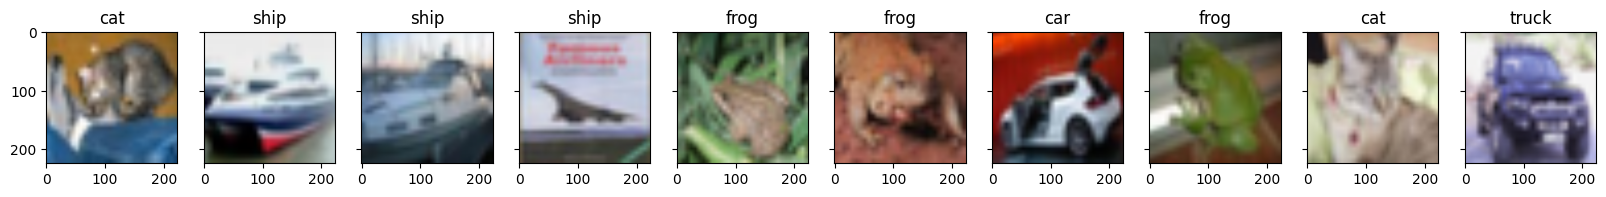

In [35]:
def unnormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

n_images = 10

fig, axes = plt.subplots(nrows=1, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))
orig_images = features[:n_images]

for i in range(n_images):
    curr_img = orig_images[i].detach().to(torch.device('cpu'))
    curr_img = unnormalize(curr_img,
                           torch.tensor([0.485, 0.456, 0.406]),
                           torch.tensor([0.229, 0.224, 0.225])) 
    curr_img = curr_img.permute((1, 2, 0))
    axes[i].imshow(curr_img)
    axes[i].set_title(classes[predicted_labels[i]])

# Resources

Trasnfer Learning: https://www.v7labs.com/blog/transfer-learning-guide